# Scikit-learn examples

### Intialization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets
import random

Matplotlib is building the font cache; this may take a moment.


# Part 1: Comparing classifiers
## Datasets
We start by making a synthetic dataset of 1600 datapoints and three classes, with 800 individuals in one class and 400 in each of the two other classes. (See https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs regarding how the data are generated.)

When we are doing experiments in supervised learning, and the data are not already split into training and test sets, we should start by splitting the data. Sometimes there are natural ways to split the data, say training on data from one year and testing on data from a later year, but if that is not the case, we should shuffle the data randomly before splitting. (OK, that is not necessary with this particular synthetic data set, since it is already shuffled by default by scikit, but that will not be the case with real-world data.) We should split the data so that we keep the alignment between `X` and `t`, which may be achieved by shuffling the indices. We split into 50% for training, 25% for validation, and 25% for final testing. The set for final testing *must not be used* till the end of the assignment.

We fix the seed both for data set generation and for shuffling, so that we work on the same datasets when we rerun the experiments.

In [2]:
from sklearn.datasets import make_blobs
X, t = make_blobs(n_samples=[400,800,400], centers=[[0,0],[1,2],[2,3]], 
                  n_features=2, random_state=2025)

In [3]:
indices = np.arange(X.shape[0])
random.seed(2025)
random.shuffle(indices)
indices[:10]

array([1125,  473,  435,  723, 1381,  260, 1147,    6,   79, 1569])

In [4]:
X_train = X[indices[:800],:]
X_val = X[indices[800:1200],:]
X_test = X[indices[1200:],:]
t_train = t[indices[:800]]
t_val = t[indices[800:1200]]
t_test = t[indices[1200:]]

Next, we will  make a second dataset by merging the two smaller classes in (X,t) and call the new set (X, t2). This will be a binary set.

In [5]:
t2_train = t_train == 1
t2_train = t2_train.astype("int")
t2_val = (t_val == 1).astype("int")
t2_test = (t_test == 1).astype("int")

Plot the two training sets.

In [6]:
def show(X, y, marker="."):
    labels = set(y)
    for lab in labels:
        plt.plot(X[y == lab][:, 1], X[y == lab][:, 0],
                 marker, label=f"class {lab}")
    plt.legend()

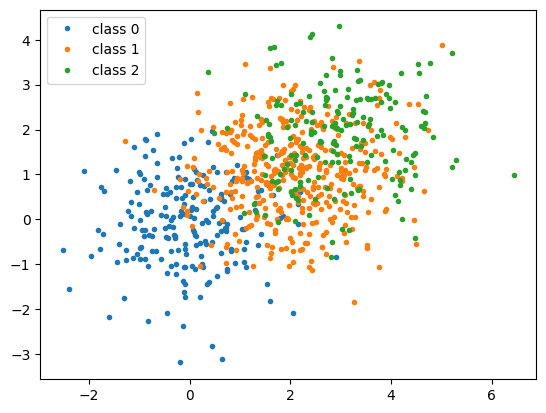

In [7]:
show(X_train, t_train)

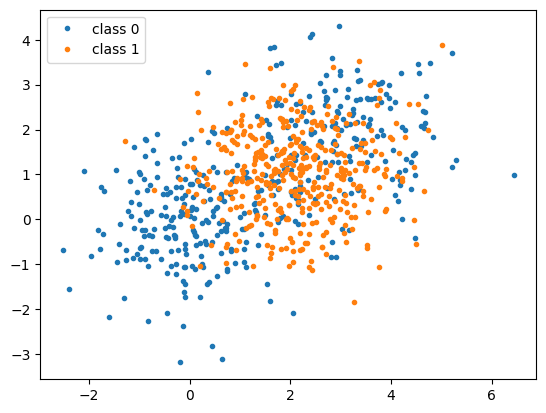

In [8]:
show(X_train, t2_train)

## Binary classifiers

### Linear regression
### Logistic regression
### Perceptron
### *k*NN

In [9]:
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.neighbors import KNeighborsClassifier

In [13]:
lin_reg_cl = RidgeClassifier()
lin_reg_cl.fit(X_train, t2_train)

RidgeClassifier()

In [16]:
# Linear regression?

In [17]:
lin_reg_cl.predict(X_val[:10, :])

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1])

In [18]:
t2_val[:10]

array([0, 0, 0, 1, 1, 1, 0, 1, 0, 0])

In [19]:
# Accuracy
lin_reg_cl.score(X_val, t2_val)

0.57

In [20]:
log_reg_cl = LogisticRegression()
log_reg_cl.fit(X_train, t2_train)

LogisticRegression()

In [21]:
# LogisticRegression?

In [22]:
# Accuracy
log_reg_cl.score(X_val, t2_val)

0.57

In [23]:
# Perceptron
per_cl = Perceptron()
per_cl.fit(X_train, t2_train)

Perceptron()

In [24]:
# Accuracy
per_cl.score(X_val, t2_val)

0.66

In [25]:
# kNN classifier with 7 neighbors
kNN_cl_7 = KNeighborsClassifier(n_neighbors=7)
kNN_cl_7.fit(X_train, t2_train)

KNeighborsClassifier(n_neighbors=7)

In [26]:
# Accuracy
kNN_cl_7.score(X_val, t2_val)

0.74

### Scaling example
We are using the `StandardScaler()`. There are also other scalers.

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [28]:
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [29]:
lin_sc = RidgeClassifier().fit(X_train_scaled, t2_train)
lin_sc.score(X_val_scaled, t2_val)

0.57

In [30]:
log_sc = LogisticRegression().fit(X_train_scaled, t2_train)
log_sc.score(X_val_scaled, t2_val)

0.5675

## Multi-class classifiers
We now turn to the task of classifying when there are more than two classes, and the task is to ascribe one class to each input. We will now use the set `(X, t)`.

### Logistic regression: "one-vs-rest" and multinomial
We saw in the lectures how a logistic regression classifier can be turned into a multi-class classifier using the one-vs-rest or multinomial approaches. One-vs-rest trains one classifier for each class and assign the class which ascribes the highest probability. A multinomial classifier uses one model for all the classes.

Let's extend the logistic regression classifier to a multi-class classifier. To do this, one must modify the target values from scalars to arrays. We will train the resulting classifier on (X_train, t_train), test it on (X_val, t_val), and report the accuracy.

In [45]:
from sklearn.multiclass import OneVsRestClassifier

In [46]:
log_reg_cl = OneVsRestClassifier(LogisticRegression())
log_reg_cl.fit(X_train, t_train)

OneVsRestClassifier(estimator=LogisticRegression())

In [47]:
log_reg_cl.score(X_val, t_val)

0.77

What about multinomial logistic regression?

In [48]:
softmax_cl = LogisticRegression()
softmax_cl.fit(X_train, t_train)

LogisticRegression()

In [49]:
softmax_cl.score(X_val, t_val)

0.77

## Highly recommended
https://scikit-learn.org/stable/getting_started.html